/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

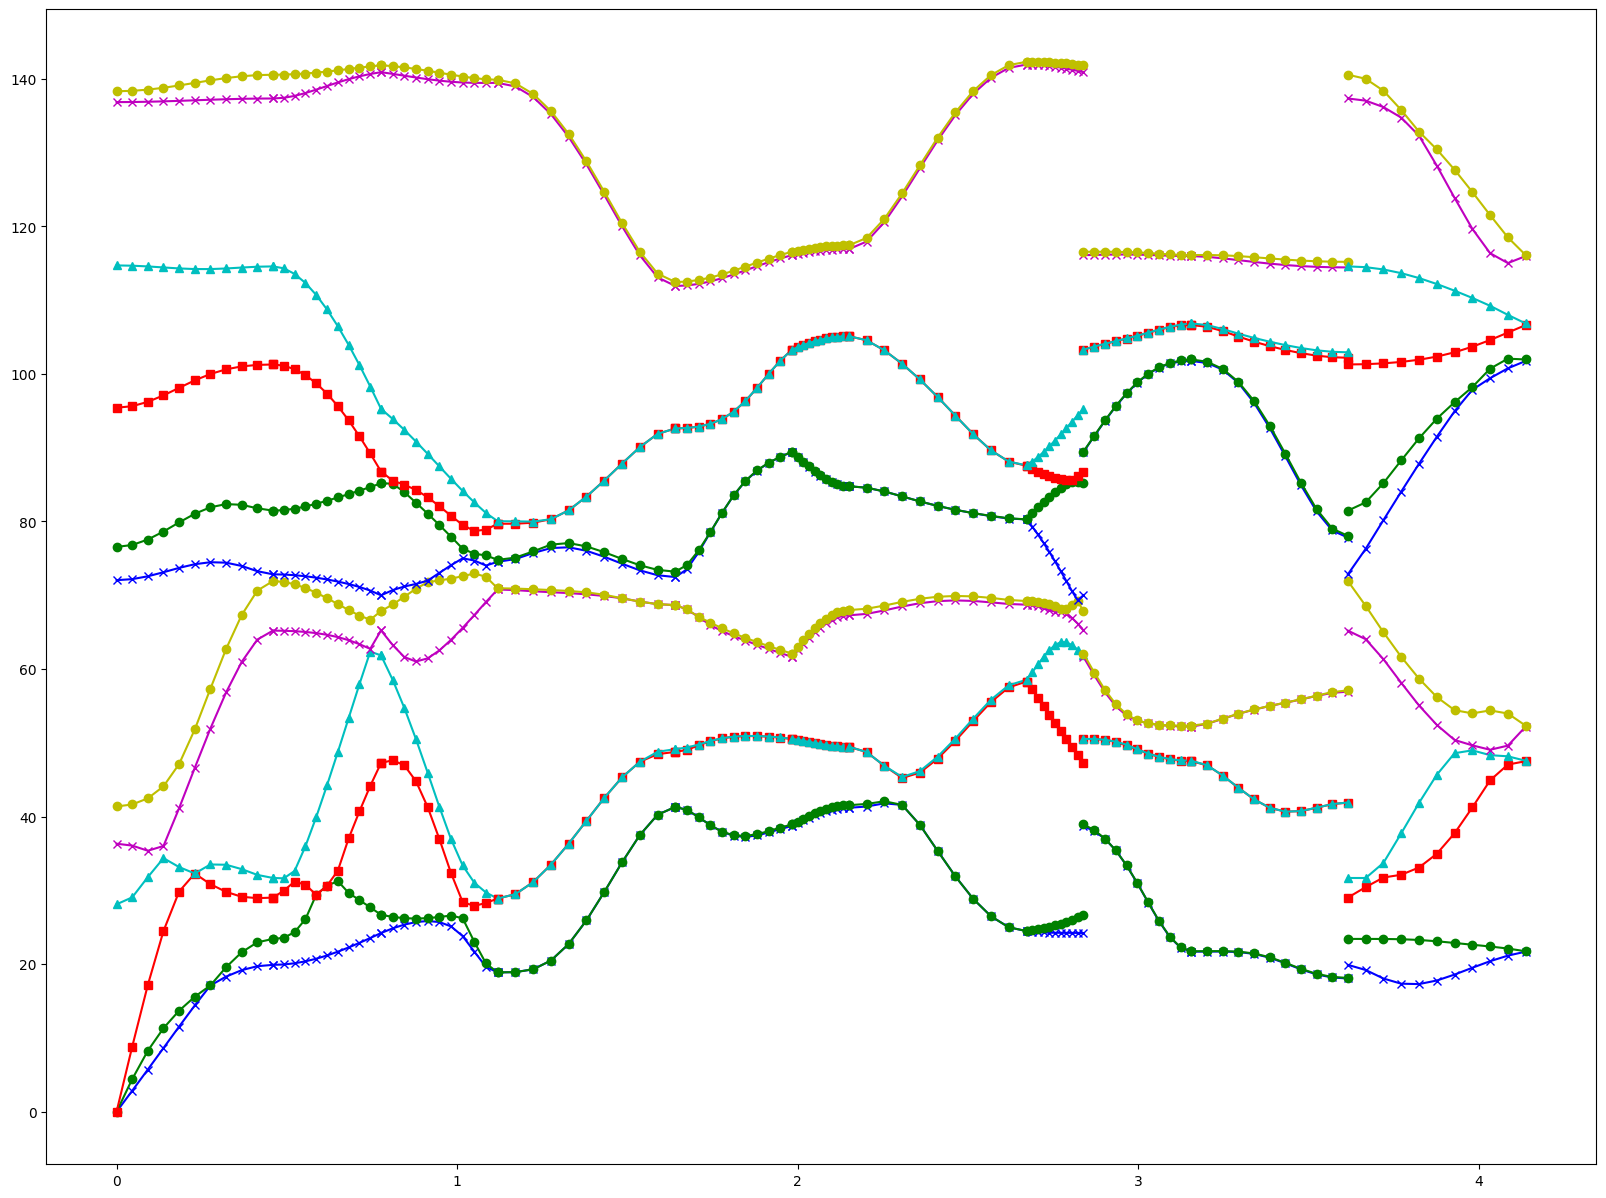

In [6]:
import os,sys,math,cmath
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from tkinter import ttk
from tkinter import messagebox as mbox
from tkinter import filedialog as fd
import pandas as pd

base_num=12
matD=np.empty((base_num,base_num),dtype=complex)
pi=np.pi 
i_num=1j 
sf=0.903

kpoint_num=12 
route_num=3 
kpr1=9 
kpr2=3
kpr3=2
kpr4=0
kpr=np.array([kpr1,kpr2,kpr3,kpr4])
k_num=10

file_name="read03.xlsx"

df_1=pd.read_excel(file_name, sheet_name='phi_1')  #调整输入表格，避免重复输入
df_5=pd.read_excel(file_name, sheet_name='gamma')
df_6=pd.read_excel(file_name, sheet_name='k-path')
df_1=df_1.fillna(0)
df_5=df_5.fillna(0)
df_6=df_6.fillna(0)

n=0
for i in range(0,27):
    exec("matK"+str(26-i)+"=np.array(df_1.iloc[n:n+base_num,6:6+base_num],dtype=complex)")
    n=n+14

matG=np.array(df_1.iloc[0:base_num,20:20+base_num],dtype=complex)

#print(matK13)
#print(matG)
#k-path coordinate put in 
for i in range(1,route_num+1):
    exec("matR"+str(i)+"=np.array(df_6.iloc[0:kpr"+str(i)+",7+5*(i-1):11+5*(i-1)],dtype=complex)")

list_eigen=[[[0] * (k_num+1) for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]

for r in range(0, route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        for k in range(0, k_num+1):
            a_i=(2*pi*(k/k_num*(matR[p+1,0]-matR[p,0])+matR[p,0]))*i_num
            b_i=(2*pi*(k/k_num*(matR[p+1,1]-matR[p,1])+matR[p,1]))*i_num
            c_i=(2*pi*(k/k_num*(matR[p+1,2]-matR[p,2])+matR[p,2]))*i_num
            
            matK=np.zeros((base_num,base_num),dtype=complex)
            
            
            for a in range(-1,2):
                for b in range(-1,2):
                    for c in range(-1,2):
                        n=(a+1)*9+(b+1)*3+c+1
                        exec("matK+=np.dot(np.dot(matG,matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG.T)")
            
            l,P=np.linalg.eig(matK)

            l=np.sort(l,axis=0)
            v=np.transpose(P)

            list_eigen[r][p][k]=l.tolist()                        

y=[[[[0.0+0j]*(k_num+1) for k in range(base_num)] for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]
for r in range(0,route_num):
    for p in range(0, kpr[r]-1):
        for value in range(0,base_num): #value 震动模式的序列
            for k in range(0,k_num+1):
                y[r][p][value][k]=list_eigen[r][p][k][value]

np_eigen=np.array(y,dtype=complex)

plt.clf()

plt.figure(figsize=(20,15))
x1=0
#计算各个高对称点之间的步长，以此给x赋值。
for r in range(0,route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        s=matR[p+1,3]
        x=np.array([x1,x1+0.1*s,x1+0.2*s,x1+0.3*s,x1+0.4*s,x1+0.5*s,x1+0.6*s,x1+0.7*s,x1+0.8*s,x1+0.9*s,x1+s])
        x1=x1+s
        
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][0]/0.000059)),color='b',marker='x')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][1]/0.000059)),'g-o')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][2]/0.000059)),'r-s')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][3]/0.000059)),'c-^')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][4]/0.000059)),'m-x')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][5]/0.000059)),'y-o')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][6]/0.000059)),color='b',marker='x')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][7]/0.000059)),'g-o')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][8]/0.000059)),'r-s')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][9]/0.000059)),'c-^')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][10]/0.000059)),'m-x')
        plt.plot(x,np.real(sf*np.sqrt(np_eigen[r][p][11]/0.000059)),'y-o')

plt.show()